In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join, exists, isfile, isdir, abspath, dirname, basename, realpath
from os import makedirs, listdir, pardir, getcwd

In [2]:
#create the graphs
#sampleDraw is created for the subgraphs' visualization
graph_fly=nx.DiGraph()
graph_fly.clear()
graph_sworm=nx.DiGraph()
graph_sworm.clear()
graph_fly_sampleDraw=nx.DiGraph()
graph_fly_sampleDraw.clear()
graph_fly_sampleDraw_connected=nx.DiGraph()
graph_fly_sampleDraw_connected.clear()
graph_sworm_sampleDraw=nx.DiGraph()
graph_sworm_sampleDraw.clear()

In [3]:
#import the data
#data source: https://www.inetbio.org/wormnet/downloadnetwork.php
parent_dir = abspath(join(join(getcwd(), pardir), pardir))
data_dir = join(parent_dir, 'data')
file_fly = pd.read_csv(join(data_dir, "DM-HT.txt"), sep="\t",header=None)
file_sworm = pd.read_csv(join(data_dir, "CE-HT.txt"), sep="\t",header=None)
file_fly_sampleDraw=file_fly.head(20)
file_sworm_sampleDraw=file_sworm.head(20)

In [4]:
file_fly_sampleDraw

,0,1,2
0,4R79.2,F33A8.4,2.053510
1,4R79.2,K08E4.1,1.718166
2,4R79.2,Y37E3.9,2.053510
3,4R79.2,Y59A8B.1,2.038247
4,AC3.2,C55A6.10,1.453145
5,AC3.7,C36B7.6,1.720563
6,AC3.7,F55F8.5,3.644694
7,AC3.7,R166.2,3.624117
8,AC3.8,C36B7.6,2.952636
9,AC3.8,F55F8.5,3.645908


In [5]:
#add data into directed graphs with weights
for row in file_fly.iterrows():
    graph_fly.add_edge(row[1][0],row[1][1],weight=row[1][2])
for row in file_sworm.iterrows():
    graph_sworm.add_edge(row[1][0],row[1][1],weight=row[1][2])
for row in file_fly_sampleDraw.iterrows():
    graph_fly_sampleDraw.add_edge(row[1][0],row[1][1],weight=round(float(row[1][2]),2))
    graph_fly_sampleDraw_connected.add_edge(row[1][0],row[1][1],weight=round(float(row[1][2]),2))
for row in file_sworm_sampleDraw.iterrows():
    graph_sworm_sampleDraw.add_edge(row[1][0],row[1][1],weight=row[1][2])
graph_fly_sampleDraw_connected.add_edge("AC3.2","4R79.2",weight=round(float(1.98),2))

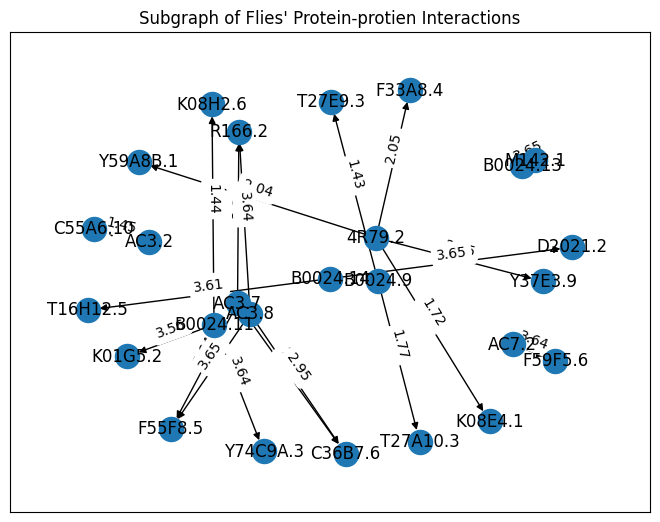

In [6]:
#draw the sample subgraph in matplotlib
pos_graph_fly_sampleDraw=nx.spring_layout(graph_fly_sampleDraw)
pos_graph_fly=nx.spring_layout(graph_fly)
labels = nx.get_edge_attributes(graph_fly_sampleDraw,'weight')
nx.draw(graph_fly_sampleDraw,with_labels=True,pos=pos_graph_fly_sampleDraw)
nx.draw_networkx_edge_labels(graph_fly_sampleDraw,pos=pos_graph_fly_sampleDraw,edge_labels=labels,verticalalignment="bottom",font_size=10)
ax = plt.gca()
ax.margins(0.1)
plt.axis("on")
plt.title("Subgraph of Flies' Protein-protien Interactions")
plt.show()

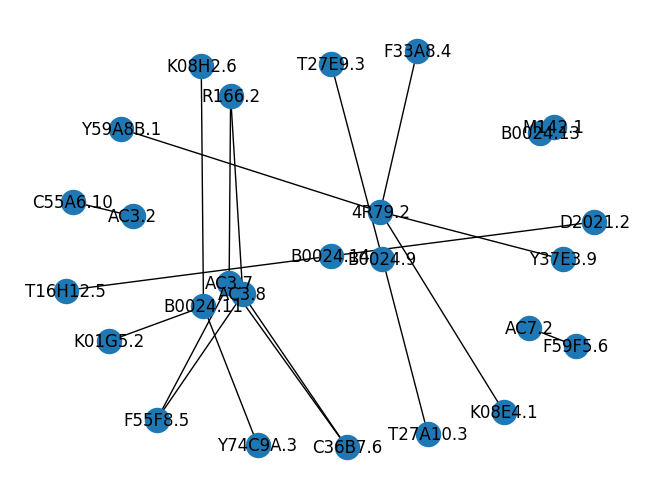

In [7]:
graph_fly_sampleDraw_undirected=graph_fly_sampleDraw.to_undirected()
nx.draw(graph_fly_sampleDraw_undirected,with_labels=True,pos=pos_graph_fly_sampleDraw)

## Graph algorithms
references:
https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [8]:
degree_centrality_graph_fly=nx.degree_centrality(graph_fly)

## Plot the graph via Plotly

In [9]:
import plotly.graph_objects as go

In [10]:
print(pos_graph_fly_sampleDraw)

{'4R79.2': array([0.19954191, 0.2073487 ]), 'F33A8.4': array([0.33794368, 0.97330723]), 'K08E4.1': array([ 0.66224796, -0.74525521]), 'Y37E3.9': array([ 0.88141724, -0.01898161]), 'Y59A8B.1': array([-0.76844553,  0.60140997]), 'AC3.2': array([-0.72564714,  0.1868834 ]), 'C55A6.10': array([-0.95034204,  0.25475887]), 'AC3.7': array([-0.36526741, -0.1326498 ]), 'C36B7.6': array([ 0.0750608 , -0.91308571]), 'F55F8.5': array([-0.63643   , -0.78416142]), 'R166.2': array([-0.35964294,  0.75844726]), 'AC3.8': array([-0.31418831, -0.18589615]), 'AC7.2': array([ 0.75619294, -0.34479634]), 'F59F5.6': array([ 0.92966047, -0.43001405]), 'B0024.11': array([-0.4610651 , -0.24314507]), 'K01G5.2': array([-0.81439887, -0.40782761]), 'K08H2.6': array([-0.46936278,  0.90019239]), 'Y74C9A.3': array([-0.25887077, -0.90076226]), 'B0024.13': array([0.79631488, 0.58016219]), 'M142.1': array([0.84693311, 0.61022536]), 'B0024.14': array([ 0.01375133, -0.00382085]), 'D2021.2': array([1.        , 0.15904854]), 'T

In [11]:
edge_x = []
edge_y = []
for edge in graph_fly.edges():
    x0=pos_graph_fly[edge[0]][0]
    y0=pos_graph_fly[edge[0]][1]
    x1=pos_graph_fly[edge[1]][0]
    y1=pos_graph_fly[edge[1]][1]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [12]:
node_x = []
node_y = []
for node in graph_fly.nodes():
    x, y =pos_graph_fly[node][0],pos_graph_fly[node][1]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [13]:
node_degree_centrality = []
node_text = []

for node in graph_fly.nodes():
    node_degree_centrality.append(degree_centrality_graph_fly[node])
    node_text.append('# of degrees: '+ str(degree_centrality_graph_fly[node]))
node_trace.marker.color = node_degree_centrality
node_trace.text = node_text

In [14]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [16]:
nx.communicability_betweenness_centrality(graph_fly_sampleDraw_undirected)

/opt/homebrew/Caskroom/mambaforge/base/envs/mgma/lib/python3.9/site-packages/networkx/algorithms/centrality/subgraph_alg.py:275: RuntimeWarning:

invalid value encountered in divide



{'4R79.2': nan,
 'F33A8.4': nan,
 'K08E4.1': nan,
 'Y37E3.9': nan,
 'Y59A8B.1': nan,
 'AC3.2': nan,
 'C55A6.10': nan,
 'AC3.7': nan,
 'C36B7.6': nan,
 'F55F8.5': nan,
 'R166.2': nan,
 'AC3.8': nan,
 'AC7.2': nan,
 'F59F5.6': nan,
 'B0024.11': nan,
 'K01G5.2': nan,
 'K08H2.6': nan,
 'Y74C9A.3': nan,
 'B0024.13': nan,
 'M142.1': nan,
 'B0024.14': nan,
 'D2021.2': nan,
 'T16H12.5': nan,
 'B0024.9': nan,
 'T27A10.3': nan,
 'T27E9.3': nan}

In [17]:
nx.in_degree_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.04,
 'K08E4.1': 0.04,
 'Y37E3.9': 0.04,
 'Y59A8B.1': 0.04,
 'AC3.2': 0.0,
 'C55A6.10': 0.04,
 'AC3.7': 0.0,
 'C36B7.6': 0.08,
 'F55F8.5': 0.08,
 'R166.2': 0.08,
 'AC3.8': 0.0,
 'AC7.2': 0.0,
 'F59F5.6': 0.04,
 'B0024.11': 0.0,
 'K01G5.2': 0.04,
 'K08H2.6': 0.04,
 'Y74C9A.3': 0.04,
 'B0024.13': 0.0,
 'M142.1': 0.04,
 'B0024.14': 0.0,
 'D2021.2': 0.04,
 'T16H12.5': 0.04,
 'B0024.9': 0.0,
 'T27A10.3': 0.04,
 'T27E9.3': 0.04}

In [18]:
nx.betweenness_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.0,
 'K08E4.1': 0.0,
 'Y37E3.9': 0.0,
 'Y59A8B.1': 0.0,
 'AC3.2': 0.0,
 'C55A6.10': 0.0,
 'AC3.7': 0.0,
 'C36B7.6': 0.0,
 'F55F8.5': 0.0,
 'R166.2': 0.0,
 'AC3.8': 0.0,
 'AC7.2': 0.0,
 'F59F5.6': 0.0,
 'B0024.11': 0.0,
 'K01G5.2': 0.0,
 'K08H2.6': 0.0,
 'Y74C9A.3': 0.0,
 'B0024.13': 0.0,
 'M142.1': 0.0,
 'B0024.14': 0.0,
 'D2021.2': 0.0,
 'T16H12.5': 0.0,
 'B0024.9': 0.0,
 'T27A10.3': 0.0,
 'T27E9.3': 0.0}

In [19]:
#nx.current_flow_betweenness_centrality(graph_fly_sampleDraw)
#for undirected graphs only

In [20]:
nx.closeness_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.04,
 'K08E4.1': 0.04,
 'Y37E3.9': 0.04,
 'Y59A8B.1': 0.04,
 'AC3.2': 0.0,
 'C55A6.10': 0.04,
 'AC3.7': 0.0,
 'C36B7.6': 0.08,
 'F55F8.5': 0.08,
 'R166.2': 0.08,
 'AC3.8': 0.0,
 'AC7.2': 0.0,
 'F59F5.6': 0.04,
 'B0024.11': 0.0,
 'K01G5.2': 0.04,
 'K08H2.6': 0.04,
 'Y74C9A.3': 0.04,
 'B0024.13': 0.0,
 'M142.1': 0.04,
 'B0024.14': 0.0,
 'D2021.2': 0.04,
 'T16H12.5': 0.04,
 'B0024.9': 0.0,
 'T27A10.3': 0.04,
 'T27E9.3': 0.04}

In [21]:
# nx.eigenvector_centrality(graph_fly_sampleDraw)
# for connected graphs only

In [58]:
#nx.current_flow_closeness_centrality(graph_fly_sampleDraw)
#for undirected graphs only

In [59]:
#nx.communicability(graph_fly_sampleDraw)
#for undirected graphs only

In [22]:
nx.load_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.0,
 'K08E4.1': 0.0,
 'Y37E3.9': 0.0,
 'Y59A8B.1': 0.0,
 'AC3.2': 0.0,
 'C55A6.10': 0.0,
 'AC3.7': 0.0,
 'C36B7.6': 0.0,
 'F55F8.5': 0.0,
 'R166.2': 0.0,
 'AC3.8': 0.0,
 'AC7.2': 0.0,
 'F59F5.6': 0.0,
 'B0024.11': 0.0,
 'K01G5.2': 0.0,
 'K08H2.6': 0.0,
 'Y74C9A.3': 0.0,
 'B0024.13': 0.0,
 'M142.1': 0.0,
 'B0024.14': 0.0,
 'D2021.2': 0.0,
 'T16H12.5': 0.0,
 'B0024.9': 0.0,
 'T27A10.3': 0.0,
 'T27E9.3': 0.0}